In [2]:
pip install yfinance


     ---------------------------------------- 69.0/69.0 kB 3.7 MB/s eta 0:00:00
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Using cached peewee-3.17.0.tar.gz (2.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Created wheel for peewee: filename=peewee-3.17.0-py3-none-any.whl size=135766 sha256=85c278355ddf306f1f25c622f6846d4e139de1191ca1de74a82741a075918f8c
  Stored in directory: c:\users\win10\appdata\local\pip\cache\wheels\6c\22\bc\5b1f8c5409d107525c879c688d7698f346bed69c5fe66c1065
Successfully built peewee
  Attempting uninstall: requests
    Found existing installati

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.8.0 requires dill, which is not installed.
tensorflow-datasets 4.8.0 requires dm-tree, which is not installed.
tensorflow-datasets 4.8.0 requires toml, which is not installed.
kaggle 1.5.12 requires python-slugify, which is not installed.
google-api-core 2.11.0 requires google-auth<3.0dev,>=2.14.1, but you have google-auth 2.6.0 which is incompatible.
google-api-core 2.11.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.17.2 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
start = "2012-01-01"
end = "2022-12-31"
stock = "GOOG"

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)

In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2763,2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000
2764,2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900
2765,2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600
2766,2022-12-29,87.029999,89.364998,86.989998,88.949997,88.949997,18280700


In [7]:
ma_100_days = data.Close.rolling(100).mean()

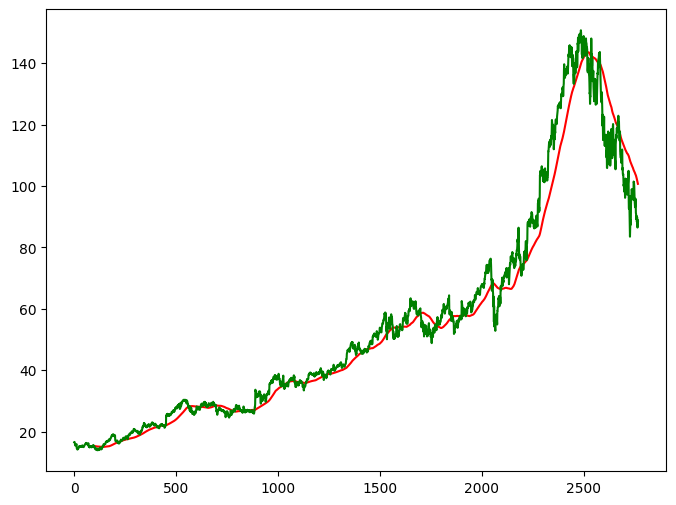

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, "r")
plt.plot(data.Close, "g")
plt.show()

In [9]:
ma_200_days = data.Close.rolling(200).mean()

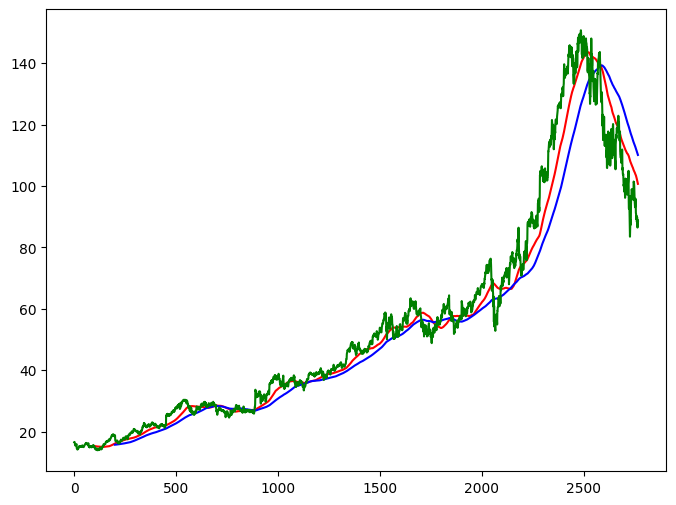

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, "r")
plt.plot(ma_200_days, "b")
plt.plot(data.Close, "g")
plt.show()

In [11]:
data.dropna(inplace=True)

In [12]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [13]:
data_train.shape[0]

2214

In [14]:
data_test.shape[0]

554

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [17]:
data_train_scale.shape[0]

2214

In [18]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [19]:
pip install protobuf==3.20.x

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement protobuf==3.20.x (from versions: 2.0.0b0, 2.0.3, 2.3.0, 2.4.1, 2.5.0, 2.6.0, 2.6.1, 3.0.0a2, 3.0.0a3, 3.0.0b1, 3.0.0b1.post1, 3.0.0b1.post2, 3.0.0b2, 3.0.0b2.post1, 3.0.0b2.post2, 3.0.0b3, 3.0.0b4, 3.0.0, 3.1.0, 3.1.0.post1, 3.2.0rc1, 3.2.0rc1.post1, 3.2.0rc2, 3.2.0, 3.3.0, 3.4.0, 3.5.0.post1, 3.5.1, 3.5.2, 3.5.2.post1, 3.6.0, 3.6.1, 3.7.0rc2, 3.7.0rc3, 3.7.0, 3.7.1, 3.8.0rc1, 3.8.0, 3.9.0rc1, 3.9.0, 3.9.1, 3.9.2, 3.10.0rc1, 3.10.0, 3.11.0rc1, 3.11.0rc2, 3.11.0, 3.11.1, 3.11.2, 3.11.3, 3.12.2, 3.12.4, 3.13.0rc3, 3.13.0, 3.14.0rc1, 3.14.0rc2, 3.14.0rc3, 3.14.0, 3.15.0rc1, 3.15.0rc2, 3.15.0, 3.15.1, 3.15.2, 3.15.3, 3.15.4, 3.15.5, 3.15.6, 3.15.7, 3.15.8, 3.16.0rc1, 3.16.0rc2, 3.16.0, 3.17.0rc1, 3.17.0rc2, 3.17.0, 3.17.1, 3.17.2, 3.17.3, 3.18.0rc1, 3.18.0rc2, 3.18.0, 3.18.1, 3.18.3, 3.19.0rc1, 3.19.0rc2, 3.19.0, 3.19.1, 3.19.2, 3.19.3, 3.19.4, 3.19.5, 3.19.6, 3.20.0rc1, 3.20.0rc2, 3.20.0, 3.20.1rc1, 3.20.1, 3.20.2, 3.20.3, 4.0

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
x,y = np.array(x), np.array(y)

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation= "relu", return_sequences = True,
              input_shape = (x.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = "relu", return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = "relu", return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 60, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [23]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [24]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
67/67 [==============================] - 299s 4s/step - loss: 0.0345
Epoch 2/50
67/67 [==============================] - 275s 4s/step - loss: 0.0092
Epoch 3/50
67/67 [==============================] - 267s 4s/step - loss: 0.0088
Epoch 4/50
67/67 [==============================] - 255s 4s/step - loss: 0.0085
Epoch 5/50
67/67 [==============================] - 225s 3s/step - loss: 0.0079
Epoch 6/50
67/67 [==============================] - 244s 4s/step - loss: 0.0064
Epoch 7/50
67/67 [==============================] - 259s 4s/step - loss: 0.0056
Epoch 8/50
67/67 [==============================] - 264s 4s/step - loss: 0.0065
Epoch 9/50
67/67 [==============================] - 264s 4s/step - loss: 0.0055
Epoch 10/50
67/67 [==============================] - 263s 4s/step - loss: 0.0051
Epoch 11/50
67/67 [==============================] - 266s 4s/step - loss: 0.0050
Epoch 12/50
67/67 [==============================] - 269s 4s/step - loss: 0.0043
Epoch 13/50
67/67 [==================

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 60)                3

In [26]:
past_100_days = data_train.tail(100)

In [28]:
data_test = pd.concat([past_100_days, data_test], ignore_index= True)

In [29]:
data_test_scale = scaler.fit_transform(data_test)

In [30]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

In [31]:
x,y = np.array(x), np.array(y)

In [32]:
y_predict = model.predict(x)

18/18 [==============================] - 6s 270ms/step


In [35]:
scale=1/scaler.scale_

In [36]:
y_predict = y_predict*scale

In [37]:
y = y*scale

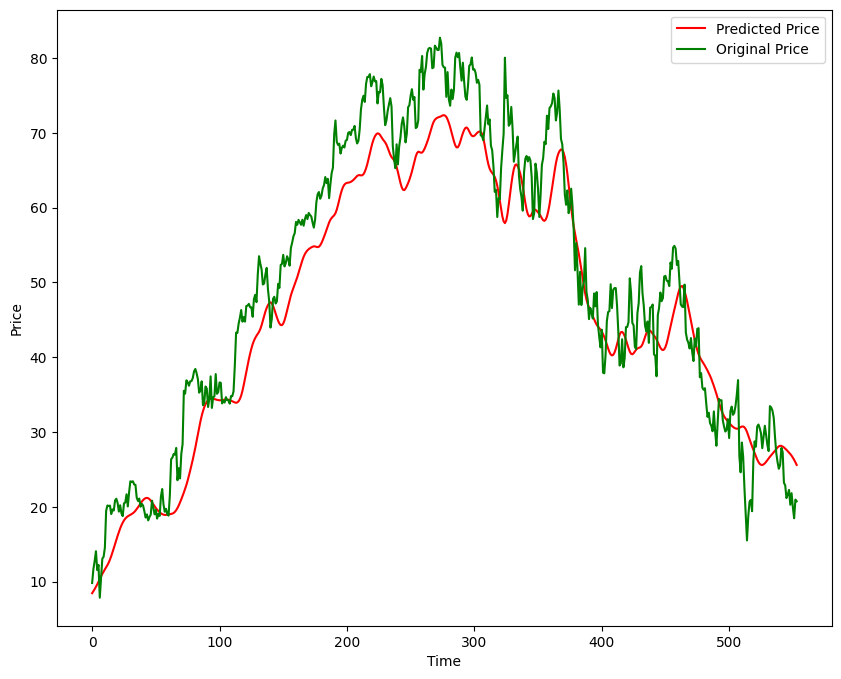

In [38]:
plt.figure(figsize= (10,8))
plt.plot(y_predict, "r", label = "Predicted Price")
plt.plot(y,"g", label= "Original Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [39]:
model.save("Stock Predictions Model.keras")